<a href="https://colab.research.google.com/github/Abdulrahmansoliman/Skin-cancer-image-classifier/blob/main/Copy_of_Baseline_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers.legacy import Adam

from tensorflow.keras.callbacks import ReduceLROnPlateau
%matplotlib inline

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load In the Data

In [ ]:
skin_df = pd.read_csv('/content/drive/MyDrive/hmnist_64_64_RGB.csv')

In [ ]:
skin_df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel12279,pixel12280,pixel12281,pixel12282,pixel12283,pixel12284,pixel12285,pixel12286,pixel12287,label
0,191,152,194,191,153,195,192,149,192,194,...,185,154,180,186,156,184,182,152,173,2
1,24,13,23,24,14,28,37,24,46,61,...,26,15,29,27,15,28,24,13,25,2
2,185,129,140,192,136,151,198,142,156,198,...,152,120,138,144,113,123,115,81,84,2
3,24,11,19,36,19,30,64,38,50,91,...,27,13,16,25,12,16,24,9,14,2
4,138,94,117,158,113,138,178,133,161,191,...,140,106,118,108,77,92,67,40,55,2


In [ ]:
X = skin_df.drop("label", axis=1).values
label = skin_df["label"].values

In [ ]:
X.shape, label.shape

((10015, 12288), (10015,))

## Scaling and Split Data into Train, Validation and Test set

In [ ]:
X_mean = np.mean(X)
X_std = np.std(X)

X = (X - X_mean)/X_std

print (X_mean,X_std)

159.8194591494919 46.388207881604245


In [ ]:
X_train_orig, X_test, y_train_orig, y_test = train_test_split(X, label, test_size=0.1,random_state=0)

In [ ]:
X_train_orig.shape, X_test.shape, y_train_orig.shape, y_test.shape

((9013, 12288), (1002, 12288), (9013,), (1002,))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_orig, y_train_orig, test_size=0.2, random_state=1)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((7210, 12288), (1803, 12288), (7210,), (1803,))

## Reshape the Data to Input in CNN

In [ ]:
X_train = X_train.reshape(X_train.shape[0], *(64, 64, 3))
X_val = X_val.reshape(X_val.shape[0], *(64, 64, 3))
X_test = X_test.reshape(X_test.shape[0], *(64, 64, 3))

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((7210, 64, 64, 3), (1803, 64, 64, 3), (1002, 64, 64, 3))

In [ ]:
y_train.shape

(7210,)

In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape, y_val.shape, y_test.shape

((7210, 7), (1803, 7), (1002, 7))

## CNN Model

In [ ]:
# Our input feature map is 64x64x3: 64x64 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(64, 64, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu', padding='same')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(7, activation='softmax')(x)

# Configure and compile the model
model = Model(img_input, output)

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496 

## Define Data Generator for Data Augmentation and Learning Rate Adaptive Reduction to Prevent Overfitting

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

train_datagen.fit(X_train)

val_datagen = ImageDataGenerator()
val_datagen.fit(X_val)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
batch_size = 64
epochs = 1
history = model.fit(train_datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = val_datagen.flow(X_val, y_val),
                              verbose = 1, steps_per_epoch=(X_train.shape[0] // batch_size),
                              callbacks=[learning_rate_reduction])

112/112 [==============================] - ETA: 0s - loss: 1.0133 - accuracy: 0.6648

112/112 [==============================] - 11s 96ms/step - loss: 1.0133 - accuracy: 0.6648 - val_loss: 0.8876 - val_accuracy: 0.6916 - lr: 0.0010


In [ ]:
loss_test, acc_test = model.evaluate(X_test, y_test, verbose=1)
loss_val, acc_val = model.evaluate(X_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))
model.save("model.h5")

57/57 [==============================] - 0s 4ms/step - loss: 0.8876 - accuracy: 0.6916
Validation: accuracy = 0.691625  ;  loss_v = 0.887581
Test: accuracy = 0.687625  ;  loss = 0.872738


Text(0.5, 1.0, 'Training and validation loss')

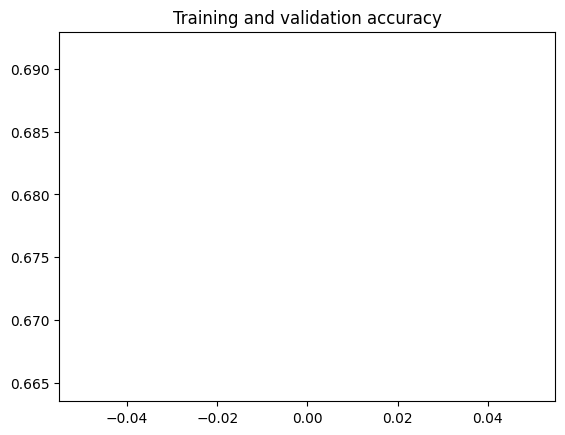

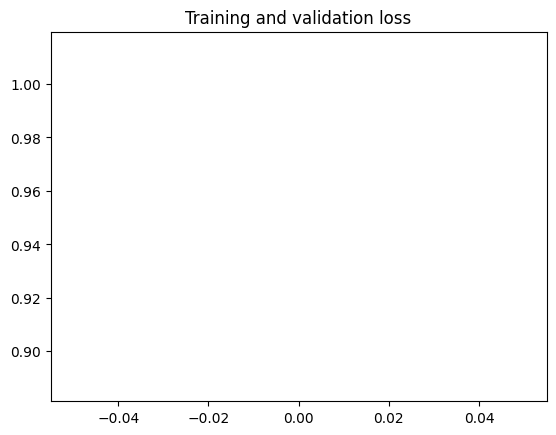

In [ ]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
print(X_test[0].shape)

(64, 64, 3)


In [ ]:
for i in range(10):
  import random
  j=random.randint(0,len(y_test))
  print(f'for {j}: prediction: {np.argmax(model.predict(X_test[j].reshape(1, 64, 64, 3)))}  Actual: {np.argmax(y_test[j])}')

[2 2 2 ... 0 0 6]
1/1 [==============================] - 0s 26ms/step
for 128: prediction: 4  Actual: 4
1/1 [==============================] - 0s 30ms/step
for 53: prediction: 4  Actual: 1
1/1 [==============================] - 0s 26ms/step
for 616: prediction: 4  Actual: 4
1/1 [==============================] - 0s 29ms/step
for 459: prediction: 4  Actual: 2
1/1 [==============================] - 0s 26ms/step
for 761: prediction: 4  Actual: 2
1/1 [==============================] - 0s 29ms/step
for 579: prediction: 4  Actual: 4
1/1 [==============================] - 0s 25ms/step
for 762: prediction: 4  Actual: 4
1/1 [==============================] - 0s 25ms/step
for 645: prediction: 1  Actual: 0
1/1 [==============================] - 0s 25ms/step
for 333: prediction: 4  Actual: 4
1/1 [==============================] - 0s 28ms/step
for 836: prediction: 4  Actual: 4


In [ ]:
t=0
for j in range(len(y_test)):
  if(np.argmax(model.predict(X_test[j].reshape(1, 64, 64, 3),verbose = 0))==np.argmax(y_test[j])):
    t+=1
  if(t%100==0):
    print(f'done {t} images')
print(f'accuracy: {t/len(y_test)}')

done 100 images
done 200 images
done 200 images
done 300 images
done 400 images
done 400 images
done 500 images
done 500 images
done 600 images
done 700 images
accuracy: 0.7445109780439122


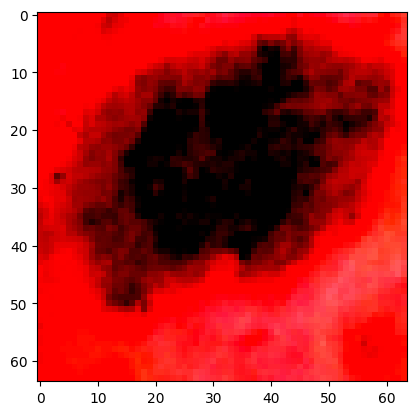

4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a numpy array representing an RGB image with size (64, 64, 3)
image = X_test[1].reshape(64, 64, 3)
# Display the image using matplotlib
plt.imshow(image)
plt.show()

x = np.argmax(model.predict(X_test[1].reshape(1, 64, 64, 3),verbose = 0))

print(x)
